## Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms

from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Create X y dataset
X, y, coef = make_regression(n_samples = 100, n_features = 1,  
                                         n_targets = 1, noise = 25, coef = True)


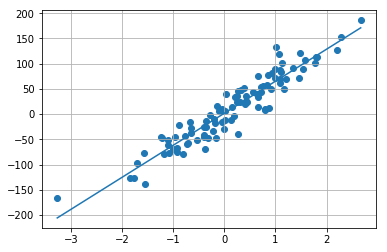

In [3]:
# Plot data

plt.scatter(X, y)
plt.plot(np.unique(X.flatten()), np.poly1d(np.polyfit(X.flatten(), y, 1))(np.unique(X.flatten())))
plt.grid(True)
plt.show()

In [4]:
# Create a dataframe of the features and add the target
df = pd.DataFrame(X)
df.columns = ['X']
df['y'] = y
print('Dataframe Head')
print(df.head())

Dataframe Head
          X           y
0 -0.192151   -9.654141
1  1.063797  119.178060
2 -3.263072 -166.489441
3  0.992980   89.303387
4 -0.095556    6.241811


In [5]:
# df info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
X    100 non-null float64
y    100 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB
None


In [6]:
# Print descriptive stats
print(df.describe())

                X           y
count  100.000000  100.000000
mean     0.152370   11.367869
std      1.011992   68.006309
min     -3.263072 -166.489441
25%     -0.434717  -41.421092
50%      0.197316   11.267276
75%      0.865303   55.318981
max      2.665266  186.170634


In [7]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X.ravel(), y.ravel())
print('slope: ', slope)
print('intercept: ', intercept)
print('r_value: ', r_value)
print('r_squared: ', r_value**2)
print('p_value: ', p_value)
print ('std_err: ', std_err)

slope:  63.5920006185
intercept:  1.67837017969
r_value:  0.946303027762
r_squared:  0.895489420351
p_value:  7.37116389226e-50
std_err:  2.19451901848


In [8]:
# Create model
# http://www.statsmodels.org/dev/examples/notebooks/generated/formulas.html
# https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/

model = ols("y ~ X", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     839.7
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           7.37e-50
Time:                        19:40:27   Log-Likelihood:                -450.43
No. Observations:                 100   AIC:                             904.9
Df Residuals:                      98   BIC:                             910.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6784      2.235      0.751      0.454      -2.757       6.113
X             63.5920      2.195     28.978      0.000      59.237      67.947
==============================================================================
Omnibus:                        1.050   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.591   Jarque-Bera (JB):                0.558
Skew:                          -0.024   Prob(JB):                        0.757
Kurtosis:                       3.363   Cond. No.                         1.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

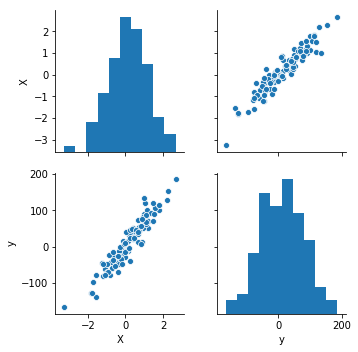

In [9]:
# Seaborh pairplog
sns.pairplot(df)

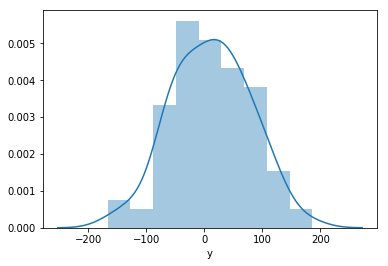

In [10]:
# Distribution plot
sns.distplot(df['y'])

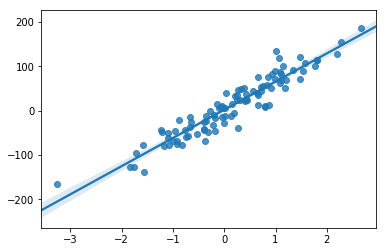

In [11]:
# use seaborn to examine confidence intervals
# https://seaborn.pydata.org/generated/seaborn.regplot.html
ax = sns.regplot(x=X, y=y, data=df)

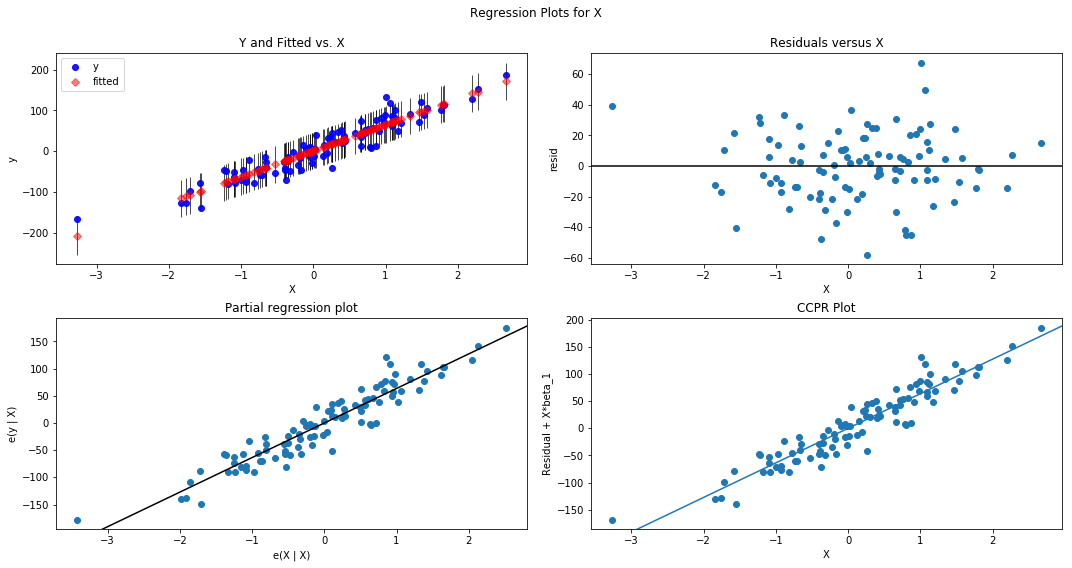

In [12]:
# Regression plots
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "X", fig=fig)

### sm.graphics.plot_regress_exog

https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/

https://www.itl.nist.gov/div898/software/dataplot/refman1/auxillar/ccpr.htm

1. The _Y and Fitted vs. X_ graph plots the dependent variable against our predicted values with a confidence interval. 
2. The _Residuals versus X_ graph shows our model's errors versus the specified predictor variable. Each dot is an observed value; the line represents the mean of those observed values. Since there's no pattern in the distance between the dots and the mean value, the OLS assumption of homoskedasticity holds.
3. The _Partial regression plot_ shows the relationship between e(y|X) and e(X|X), taking in to account the impact of adding other independent variables on our existing total_unemployed coefficient.
4. The _Component and Component Plus Residual (CCPR)_ plot is an extension of the partial regression plot and shows the impact on our trend line when adding other independent variables. The CCPR plot is a refinement of the partial residual plot. It generates a partial residual plot but also adds Xi versus Xi. This is the component part of the plot and is intended to show where the fitted line would lie.

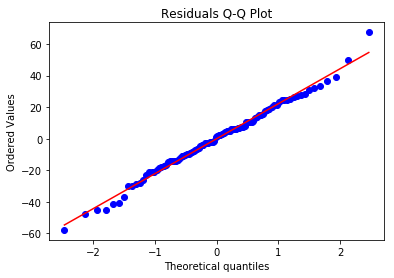

In [13]:
# Probability Plot
stats.probplot(model.resid, dist="norm", plot= plt)
plt.title("Residuals Q-Q Plot")
plt.show()

In [14]:
# https://pythonfordatascience.org/linear-regression-python/
# Assumption of multicollinearity
print(df.corr())

          X         y
X  1.000000  0.946303
y  0.946303  1.000000


In [15]:
# Assumption of independent errors
print(statsmodels.stats.stattools.durbin_watson(model.resid))

1.83118088389


In [16]:
# Assumption of normality of the residuals
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
print(lzip(name, test))

[('Jarque-Bera', 0.5576496766972453), ('Chi^2 two-tail prob.', 0.75667243160043407), ('Skew', -0.024174039032815314), ('Kurtosis', 3.3626270615311253)]


In [17]:
# Assumption of homoscedasticity
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
print(lzip(name, test))

[('Lagrange multiplier statistic', 0.088660821833841386), ('p-value', 0.76588659674627579), ('f-value', 0.086964709022893244), ('f p-value', 0.76869577471340378)]



Values for the line equation from the first several iterations of the gradient descent
Iteration 0: y = 1.1368 + 6.6207x and the cost: 1927.1804
Iteration 6: y = 4.4362 + 33.9565x and the cost: 686.0297
Iteration 12: y = 4.7352 + 48.0136x and the cost: 362.5185
Iteration 18: y = 4.1430 + 55.3170x and the cost: 274.6946
Iteration 24: y = 3.4364 + 59.1515x and the cost: 249.8374

Via formula: y = 1.6784 + 63.5920x


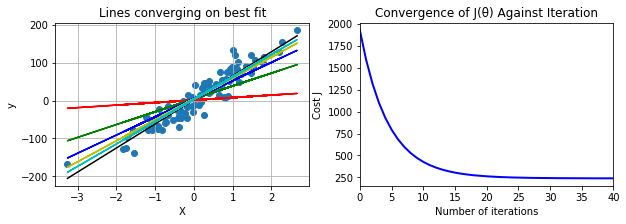

In [18]:
def cost_function(X, y, theta):

    return ((X.dot(theta) - np.vstack(y.T)) ** 2).sum()/(2 * y.size)

def gradientDescent(X, y, theta, alpha, num_iters):

    # Initialize values
    J_history = np.zeros((num_iters, 1))
    colors = ['r', 'g', 'b', 'y', 'c']
    j = 0
    print()
    print('Values for the line equation from the first several iterations of the gradient descent')

    for i in range(num_iters):       
        # beta = beta - alpha * (X.T.dot(X.dot(beta)-y)/m)
        theta = theta - alpha*(1.0/m) * X.T.dot(X.dot(theta) - np.vstack(y.T))

        # cost history    
        J_history[i] = cost_function(X, y, theta)
        
        if i < 30 and i % 6 == 0:
            # Show some thetas and costs in the line equation as it approaches best fit
            # Assuming convergence is before 30 iterations
            print ('Iteration {}: y = {:0.4f} + {:0.4f}x and the cost: {:0.4f}'.format(i, theta[0][0], theta[1][0], J_history[i][0]))
            plt.plot(Xcopy, theta[0][0] + theta[1][0] * Xcopy, '-', c=colors[j])
            j += 1

    return theta, J_history

# Andrew Ng's M&Ns
m, n = X.shape # observations, features

# Save original X
Xcopy = X.copy()
Xcopy = Xcopy.flatten()

# Reshape X and add bias
X = np.append(arr = np.ones((y.size, 1)).astype(int), values = X.reshape(y.size, 1), axis = 1)

# Plot equation lines based on gradient descent
plt.figure(figsize=(10,3))

plt.subplot(121)

# Plot data 
# y = 0.1383 + 0.7234x
plt.scatter(Xcopy, y)

# plt.plot(Xcopy, a1 + b1 * Xcopy, 'r-', linewidth=3)
plt.plot(np.unique(Xcopy), np.poly1d(np.polyfit(Xcopy, y, 1))(np.unique(Xcopy)), 'k-')

plt.grid(True)
plt.title('Lines converging on best fit')
plt.xlabel('X')
plt.ylabel('y')

# Choose a learning rate
alpha = 0.1
num_iters = 1000

# Init weights and run gradient descent 
# theta = np.zeros((X.shape[1], 1)) 
theta=[[0], [0]]
theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)

# Get slope and intercept
# denominator = y.size * sum(map(lambda x:x*x,X)) - X.sum()**2
# a = ((y.sum() * X.dot(X)) - (X.sum() * sum(X * y))) / denominator
# b = ((y.size * sum(X * y)) - (X.sum() * y.sum())) / denominator
# print()
# print ('y = {:0.4f} + {:0.4f}x'.format(a, b))

# Similar method to get slope and intercept
d = Xcopy.dot(Xcopy) - Xcopy.mean() * Xcopy.sum()
a1 = ( y.mean() * Xcopy.dot(Xcopy) - Xcopy.mean() * Xcopy.dot(y) ) / d
b1 = ( Xcopy.dot(y) - y.mean() * Xcopy.sum() ) / d
print()
print ('Via formula: y = {:0.4f} + {:0.4f}x'.format(a1, b1))

plt.subplot(122)

# Plot the graph
plt.plot(range(J_history.size), J_history, "-b", linewidth=2 )
plt.title('Convergence of J(\u03B8) Against Iteration')
# r'J($\theta$)'
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.xlim((0, 40))
plt.show(block=False)

In [19]:
# print()
# print('Theta via Make Regression Function')
# print(pd.DataFrame(coef, columns=['True Coefficient Values']))
# print()
print('Cost and theta values')
print(J_history[-1][0])
print(theta.flatten())

Cost and theta values
239.256562203
[  1.67837018  63.59200062]


Intercept:  0.154390112084
Coefficients:  66.9235462311
Mean squared error: 612.86
Root mean squared error: 24.76
Mean absolute error: 19.77
Variance score: 0.80


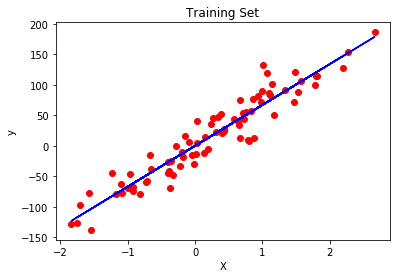

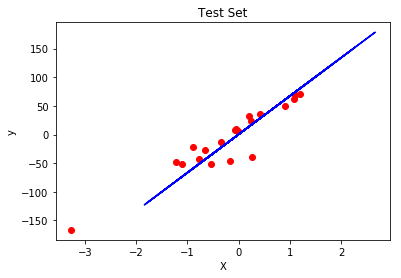

In [20]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xcopy.reshape(y.size,1), y, test_size = 1/5, random_state = 0)

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# The intercept coefficient
# https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
print('Intercept: ', regressor.intercept_)
print('Coefficients: ', regressor.coef_[0])
# The mean squared error mse
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The root mean squared error rmse
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# The mean absolute error mae
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Training Set')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Test Set')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

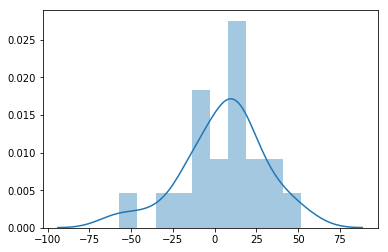

In [21]:
# Plot of residuals
sns.distplot((y_test-y_pred),bins=10);